In [1]:
import time
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

%matplotlib inline
from IPython import display

from dqn_agent import DQN_AGENT

In [2]:
env = gym.make("CartPole-v0")
env.seed(42)
print("State Space  : ", env.observation_space)
print("Action Space : ", env.action_space)

State Space  :  Box(4,)
Action Space :  Discrete(2)


In [3]:
env_state_size = env.observation_space.shape[0]
env_action_size = env.action_space.n

In [4]:
def plot_scores(scores, rolling_mean):
    plt.plot(scores, label="Scores")
    plt.plot(rolling_mean, label="Rolling Mean")
    plt.xlabel('Episode')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

In [5]:
def replay_memory_initialize(env, agent, eps, size):
    exp_count = 0
    start = time.time()
    state = env.reset()
    
    print(f"Initializing Replay Buffer with {size} experiences ...")
    
    while exp_count < size:
        action = agent.act(state, eps)
        next_state, reward, done, _ = env.step(action)
        agent.step(state, action, next_state, reward, done)
        state = next_state
        exp_count += 1
        
        if done:
            state = env.reset()
            
    print("Finished Initializing Replay Buffer with {} experiences ... in time {:.1f} secs".format(size, time.time() - start))

E-870---> Score : 155.00	Rolling Mean : 162.35	Max Score : 200.00	Time : 6.3 secs	eps : 0.01


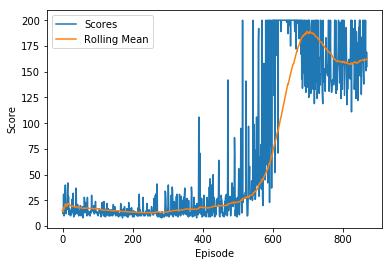

KeyboardInterrupt: 

In [6]:
agent = DQN_AGENT(env_state_size, env_action_size, 42)

eps_start = 1.0
eps_fixed = 0.01
eps_decay = 0.995
eps = eps_start

score = 0
scores = list()
rolling_mean = list()
scores_window = deque(maxlen=100)

replay_memory_initialize(env, agent, eps, size=1500)

start = time.time()

for i in range(1, 1000+1):
    state = env.reset()
    
    while True:
        action = agent.act(state, eps)
        next_state, reward, done, _ = env.step(action)
        agent.step(state, action, next_state, reward, done)
        state = next_state
        score += reward
        
        if done:
            scores.append(score)
            scores_window.append(score)
            rolling_mean.append(np.mean(scores_window))
            break
            
            
    if i % 10 == 0:
        display.clear_output(wait=True)
        print("E-{}---> Score : {:.2f}\tRolling Mean : {:.2f}\tMax Score : {:.2f}\tTime : {:.1f} secs\teps : {:.2f}".format(
        i, score, rolling_mean[-1], np.max(scores), time.time() - start, eps))
        plot_scores(scores, rolling_mean)
        start = time.time()
        
    score = 0
    eps = max(eps_fixed, eps*eps_decay)
        